# Objective:
The objective of this assignment is to perform an in-depth Exploratory Data Analysis (EDA) on a complex dataset to:

1.Understand data distributions

2.Identify missing values

3.Detect outliers

4.Uncover relationships between variables

Visualizations such as histograms, box plots, count plots, KDE plots, and heatmaps will be used to support findings.

# 1.Dataset Overview:
We will be using the Titanic dataset, a classic dataset containing information about passengers on the Titanic, including whether they survived or not, their age, ticket class, fare, gender, etc.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic.csv')

# Display first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.Basic Data Exploration:
 Check dataset dimensions, column names, and data types

In [2]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Data types and missing values
df.info()

# Descriptive statistics
df.describe(include='all')


Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Observation:
1.The dataset contains 891 rows and 12 columns.

2.Data types include numerical (int64, float64) and categorical (object) variables.

3.Some columns like Age, Cabin, and Embarked contain missing values.

# 3.Missing Values Analysis:
Check for missing values in the dataset.

In [3]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values
missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


# Observation:
1.Cabin: 77% missing values.

2.Age: 19.86% missing.

3.Embarked: 0.22% missing.



# 4.Univariate Analysis
 Numerical Features (Histograms + KDE plots)

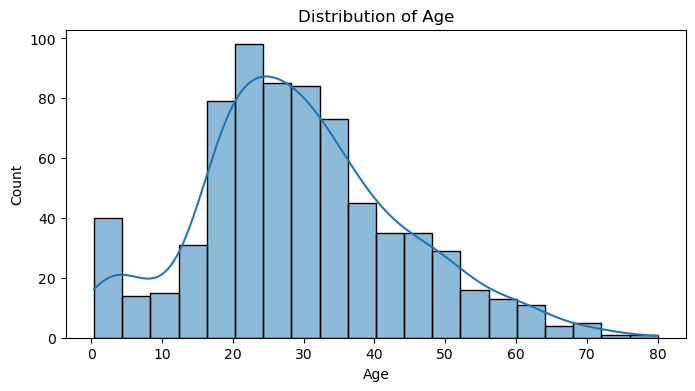

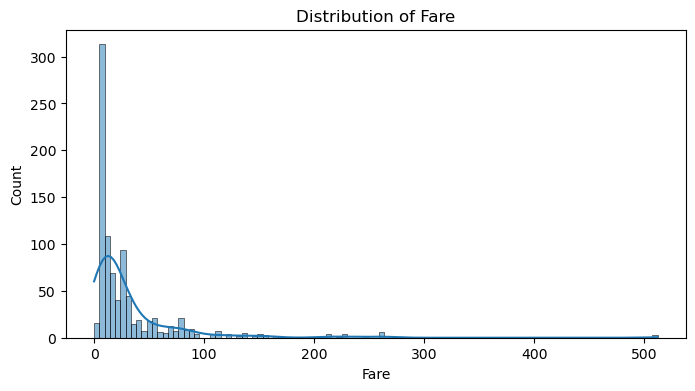

In [4]:
# List of numerical features
num_features = ['Age', 'Fare']

# Plot histograms with KDE
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


#  Observation:
1.Age: Most passengers were between 20-40 years.

2.Fare: Highly right-skewed with some very high fares.

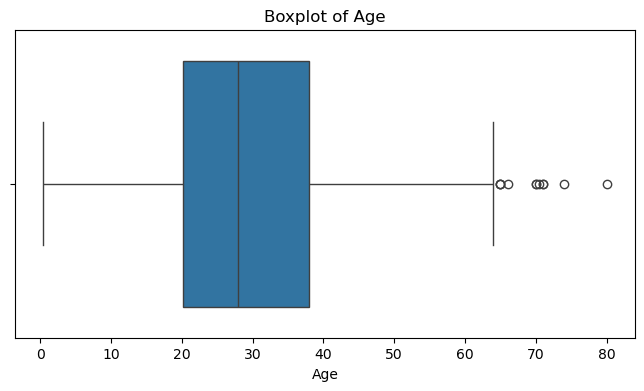

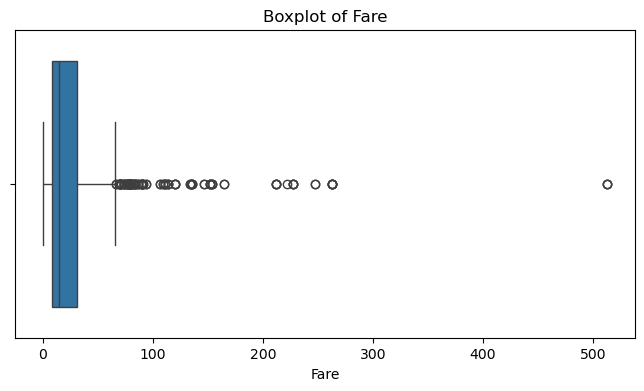

In [5]:
# 5. Outlier Detection (Box Plots)
# Boxplots for numerical features
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


# Observation:
1.Fare: Significant outliers above 300.

2.Age: A few values above 70.

# 6.Bivariate Analysis
Survival Rate by Gender



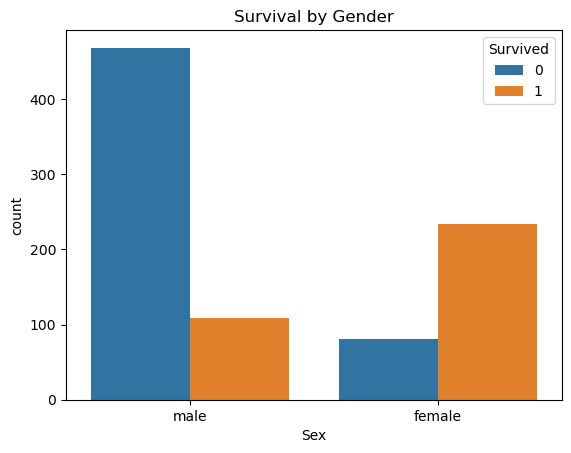

In [6]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


# Observation:

Females had a much higher survival rate than males.

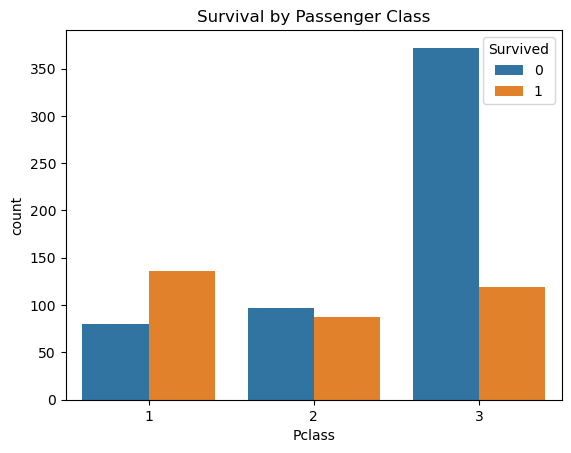

In [7]:
#Survival Rate by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Observation:

Higher survival rate among 1st class passengers.

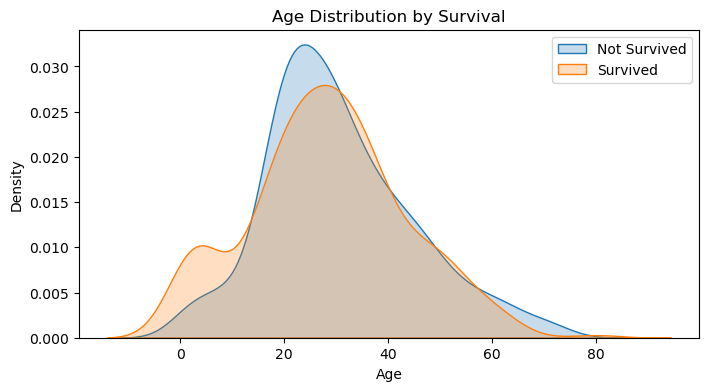

In [13]:
# Age Distribution by Survival Status
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Survived']==0]['Age'].dropna(), label='Not Survived', fill=True)
sns.kdeplot(df[df['Survived']==1]['Age'].dropna(), label='Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()



# Observation:

Children (below 10 years) had higher survival rates.

# 7.Correlation Analysis
 Correlation Heatmap for Numerical Features

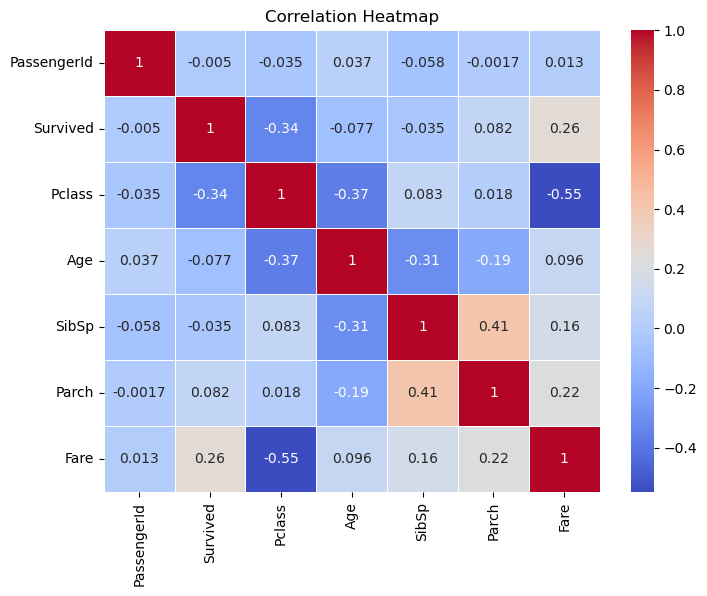

In [14]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# Observation:

1.Fare positively correlated with Survival.

2.Pclass negatively correlated with Survival.

# Recommendations
1.Impute missing Age values (using median or predictive model).

2.Drop Cabin column due to excessive missing values.

3.Engineer new features like Family Size (SibSp + Parch).

4.Handle outliers in Fare (log transformation or capping).

5.Use significant variables like Sex, Pclass, Age, Fare for predictive modeling.



# Conclusion
This Exploratory Data Analysis provided critical insights into the Titanic dataset:

1.Identified missing values and handled missing data strategy recommendations.

2.Understood distribution of numerical and categorical variables.

3.Detected outliers in key numerical columns.

4.Uncovered important relationships between variables and passenger survival.

5.Established a foundation for future predictive modeling and feature engineering tasks.

